In [1]:
!python --version

Python 3.9.1


In [2]:
import platform

print('\n', "Laptop Specs:", '\n', 
      platform.machine(), '\n', 
      platform.platform(), '\n', 
      platform.processor())


 Laptop Specs: 
 AMD64 
 Windows-10-10.0.19041-SP0 
 AMD64 Family 23 Model 96 Stepping 1, AuthenticAMD


# Distribution of Gaia EDR3 Globular Clusters (GCs) and Open Clusters (OCs) Within the Night Sky

- There are two types of star clusters: open clusters (OCs) and globular clusters (GCs). When it comes to studying their distribution within our galaxy, it is important to visualize their distribution within the night sky. The use of the latest Gaia EDR3 data is encouraged.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astroquery.vizier import Vizier
from astropy.table import Table
Vizier.ROW_LIMIT = -1

# I. Downloading CAN+20, the catalogue of Open Cluster (OC) positions and members

- First, we need the OC catalogue [Portrait Galactic disc : J/A+A/640/A1](https://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/A+A/640/A1) which is the output of the paper [Painting a portrait of the Galactic disc with its stellar clusters](https://www.aanda.org/articles/aa/pdf/2020/08/aa38192-20.pdf). 

In [4]:
%%time
query = Vizier.get_catalogs(catalog="J/A+A/640/A1")
print(query)

TableList with 2 tables:
	'0:J/A+A/640/A1/table1' with 20 column(s) and 2017 row(s) 
	'1:J/A+A/640/A1/nodup' with 15 column(s) and 234128 row(s) 
CPU times: total: 11.3 s
Wall time: 11.3 s


- As we can see, there are two datasets, one for the data for each OC, the other for each OCs' members. We only need the first dataset. 

- The plan is to create `DataFrame` objects out of the downloaded catalogues using `pandas`.

- But first, we need to create a filepath wherein we will save our output dataframes.

In [5]:
import os

In [6]:
try:
    os.makedirs('Data//Output//Fig1//df')
except OSError:
    pass

try:
    os.makedirs('Data//Output//Fig1//img')
except OSError:
    pass

#### Download `table1`, the Catalogue of Clusters

- Using `astroquery`'s `Vizier` module, we will download `table1` then save it as `pandas` `DataFrame`.
- We only need the columns for each OC name, the coordinates in both right ascension and declination $(\alpha, \delta)$ and their corresponding galactic coordinates $(l,b)$.

In [7]:
table1_cols = ['Cluster', 
               'RA_ICRS', 'DE_ICRS', 
               'GLON', 'GLAT']
table1 = Vizier(columns=table1_cols, catalog='J/A+A/640/A1/table1', row_limit=-1).query_constraints()
table1_df = table1[0].to_pandas()
table1_df.to_csv('Data//Output//Fig1//df//CA+20_table1_df.csv', index=False)
table1_df

,Cluster,RA_ICRS,DE_ICRS,GLON,GLAT
0,ASCC_10,51.869999,34.980999,155.723007,-17.770
1,ASCC_101,288.398987,36.368999,68.028000,11.608
2,ASCC_105,295.548004,27.365999,62.825001,2.063
3,ASCC_107,297.164001,21.987000,58.903999,-1.901
4,ASCC_108,298.306000,39.348999,74.377998,6.074
...,...,...,...,...,...
2012,vdBergh_1,99.275002,3.078000,208.556000,-1.781
2013,vdBergh_80,97.738998,-9.625000,219.246994,-8.891
2014,vdBergh_83,100.025002,-27.188999,236.447998,-14.329
2015,vdBergh_85,101.718002,1.320000,211.237000,-0.414


- Let's use `astropy` in order to convert OCs into `SkyCoord` objects, specifying that the reference frame is galactic and the equinox is J2015.5 (the epoch used in Gaia EDR3). 
- We will create `c_CA20` which will contain all CA+20 OCs as `SkyCoord` objects.

In [8]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [9]:
c_CA20 = SkyCoord(l = table1_df['GLON'].values*u.degree, 
                  b = table1_df['GLAT'].values*u.degree, 
                  frame = 'galactic', equinox="J2015.5") 

- Using the `SkyCoord` object `c_CA20` allows us to plot the angular positions of OC data into a plane.
- The coordinates in galactic coordinates are our main interest, since we want to see how distributed they are in the Milky Way's reference frame. 
- The galactic coordinate system uses the Sun as its origin with the galactic longitude $l=0$ towards the center of the galaxy.

[Text(0.5, 0, 'Galactic Longitude $l(\\degree)$'),
 Text(0, 0.5, 'Galactic Latitude $b(\\degree)$')]

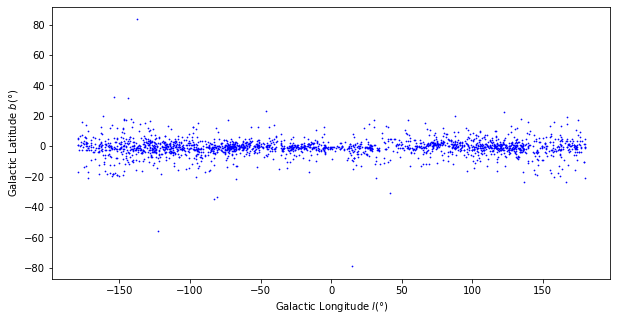

In [10]:
fig, ax = plt.subplots(figsize=(10,5), 
                      )

ax.scatter(c_CA20.l.wrap_at('180d'), 
           c_CA20.b, c='blue', s=0.5)

ax.set(xlabel=r'Galactic Longitude $l(\degree)$', 
       ylabel=r'Galactic Latitude $b(\degree)$')

# II. Downloading Vasiliev21, the catalogue of Globular Cluster (OC) positions

- Next, we are interested in the Gaia EDR3 globular cluster catalogue [Gaia EDR3 view on Galactic globular clusters : J/A+A/640/A1](https://cdsarc.cds.unistra.fr/viz-bin/cat/J/MNRAS/505/5978) which is the output of the paper [Gaia EDR3 view on Galactic globular clusters](https://academic.oup.com/mnras/article/505/4/5978/6283730). 

In [11]:
query = Vizier.get_catalogs(catalog="J/MNRAS/505/5978")
print(query)

TableList with 1 tables:
	'0:J/MNRAS/505/5978/tablea1' with 14 column(s) and 170 row(s) 


- Only the $(\alpha, \delta)$ coordinates are available. 

In [12]:
Vas21_cols = ['Name', 
              'RAJ2000', 'DEJ2000']
Vas21 = Vizier(columns=Vas21_cols, catalog='J/MNRAS/505/5978', row_limit=-1).query_constraints()
Vas21_df = Vas21[0].to_pandas()
Vas21_df.to_csv('Data//Output//Fig1//df//Vas21_table1_df.csv', index=False)
Vas21_df

,Name,RAJ2000,DEJ2000
0,NGC 104,6.024000,-72.081001
1,NGC 288,13.188000,-26.583000
2,NGC 362,15.809000,-70.848999
3,Whiting 1,30.737000,-3.253000
4,NGC 1261,48.068001,-55.216000
...,...,...,...
165,NGC 7089,323.363007,-0.823000
166,NGC 7099,325.092010,-23.180000
167,Pal 12,326.661987,-21.253000
168,Pal 13,346.684998,12.772000


- We need the `FK5` module in order to convert the J2000 epoch of coordinates into J2015.5.

In [13]:
from astropy.coordinates import FK5

In [14]:
c_Vas21 = SkyCoord(ra = Vas21_df['RAJ2000'].values*u.degree, 
                   dec = Vas21_df['DEJ2000'].values*u.degree, 
                   frame = 'icrs', equinox="J2000").transform_to(FK5(equinox='J2015.5'))  

- It is easy to convert to galactic coordinates. We just type `c_Vas21.l` and `c_Vas21.b` to access the $(l,b)$ of the GCs.

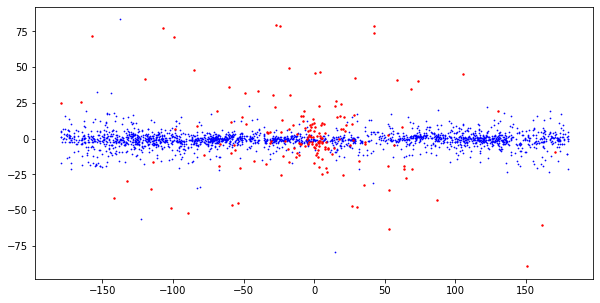

In [15]:
fig, ax = plt.subplots(figsize=(10,5), 
                       #subplot_kw={'projection':'mollweide'}
                      )

#ax.imshow(resultcolor, extent=[0,360,-90,90])
ax.scatter(c_CA20.l.wrap_at('180d'), c_CA20.b, c='blue', s=0.5)
ax.scatter(c_Vas21.galactic.l.wrap_at('180d'), c_Vas21.galactic.b, c='red', s=2)

- It is more appropriate to plot the star clusters in the Mollweide projection.

[Text(0.5, 0, 'Galactic Longitude $l$'), Text(0, 0.5, 'Galactic Latitude $b$')]

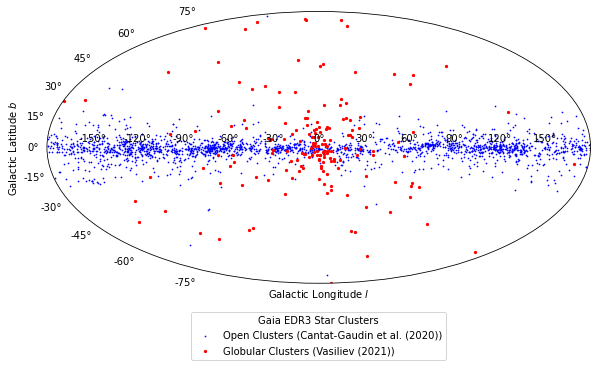

In [16]:
fig, ax = plt.subplots(figsize=(10,5), 
                       subplot_kw={'projection':'mollweide'}
                      )

ax.scatter(c_CA20.l.wrap_at('180d').radian, 
           c_CA20.b.radian, 
           c='blue', s=0.5, 
           label='Open Clusters (Cantat-Gaudin et al. (2020))')
ax.scatter(c_Vas21.galactic.l.wrap_at('180d').radian, 
           c_Vas21.galactic.b.radian, 
           c='red', s=5, 
           label='Globular Clusters (Vasiliev (2021))')

ax.legend(title='Gaia EDR3 Star Clusters', 
          loc='lower center', 
          bbox_to_anchor=(0.5, -0.3)
         )

ax.set(xlabel=r'Galactic Longitude $l$', 
       ylabel=r'Galactic Latitude $b$')

# III. Download Gaia EDR3 Sky Map

![title](https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2020/12/the_colour_of_the_sky_from_gaia_s_early_data_release_32/22358131-1-eng-GB/The_colour_of_the_sky_from_Gaia_s_Early_Data_Release_3_pillars.png)

- Since we want to view the distributions of OCs and GCs within the night sky, we need to have the image of the Milky Way as the appropriate background image. 
- Fortunately, the extent of the Gaia EDR3 survey that was covered is provided by [A. Moitinho](https://www.esa.int/ESA_Multimedia/Images/2020/12/The_colour_of_the_sky_from_Gaia_s_Early_Data_Release_32).
- We can download and save this image using the `requests` library.

In [17]:
import requests

In [18]:
img_url='https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2020/12/the_colour_of_the_sky_from_gaia_s_early_data_release_32/22358131-1-eng-GB/The_colour_of_the_sky_from_Gaia_s_Early_Data_Release_3_pillars.png'

response = requests.get(img_url)
file = open("Data//Output//Fig1//img//edr3_skymap.png", "wb")
file.write(response.content)
file.close()

- We can subsequently load the image using `numpy`'s `imread`, with the read image object referred to as `edr3_skymap`.

[Text(0.5, 0, 'Galactic Longitude $l(\\degree)$'),
 Text(0, 0.5, 'Galactic Latitude $b(\\degree)$')]

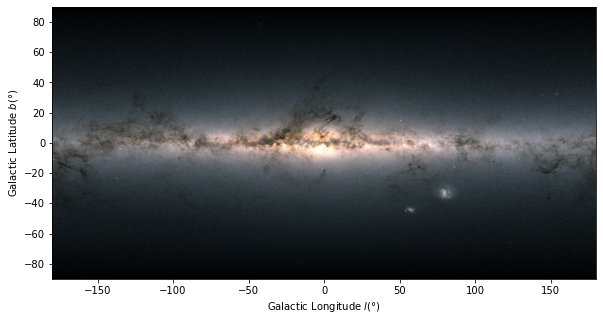

In [19]:
fig, ax = plt.subplots(figsize=(10,5), 
                       #subplot_kw={'projection':'mollweide'}
                      )

edr3_skymap = plt.imread("Data//Output//Fig1//img//edr3_skymap.png")

ax.imshow(edr3_skymap, extent=[-180,180,-90,90])


ax.set(xlabel=r'Galactic Longitude $l(\degree)$', 
       ylabel=r'Galactic Latitude $b(\degree)$')

- Combining our plots result to the following figure:

[Text(0.5, 0, 'Galactic Longitude $l(\\degree)$'),
 Text(0, 0.5, 'Galactic Latitude $b(\\degree)$')]

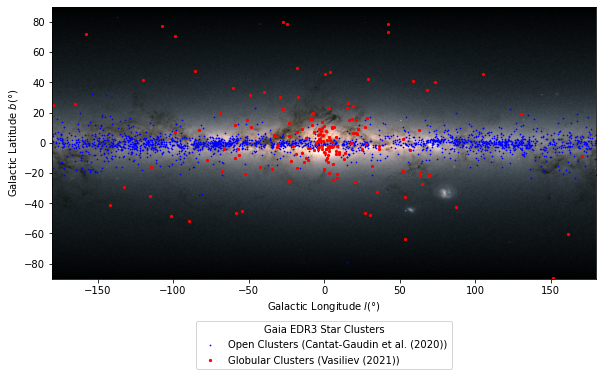

In [20]:
fig, ax = plt.subplots(figsize=(10,5), 
                       #subplot_kw={'projection':'mollweide'}
                      )

#ax.imshow(edr3_skymap, extent=[-180,180,-90,90])
ax.imshow(edr3_skymap, extent=[-180,180,-90,90])
ax.scatter(c_CA20.l.wrap_at('180d'), 
           c_CA20.b, 
           c='blue', s=0.5, 
           label='Open Clusters (Cantat-Gaudin et al. (2020))')
ax.scatter(c_Vas21.galactic.l.wrap_at('180d'), 
           c_Vas21.galactic.b, 
           c='red', s=5, 
           label='Globular Clusters (Vasiliev (2021))')

ax.legend(title='Gaia EDR3 Star Clusters', 
          loc='lower center', 
          bbox_to_anchor=(0.5, -0.35)
         )

ax.set(xlabel=r'Galactic Longitude $l(\degree)$', 
       ylabel=r'Galactic Latitude $b(\degree)$')

- We need to create a function`pcolormesh_projected` in order to project any `numpy` image array based on any given `matplotlib` projection. 
- The code below is based on this `matplotlib` [issue](https://github.com/matplotlib/matplotlib/issues/12958).
- Note that we have to invert the y-axis.

In [21]:
def pcolormesh_projected(img, projection=None, fig=None, ax=None):
    
    if (fig or ax ) is None:
        fig, ax = plt.subplots(subplot_kw={'projection':projection})
        
    lon = np.linspace(-np.pi,np.pi, img.shape[1])
    lat = np.linspace(np.pi/2,-np.pi/2, img.shape[0])
    LON, LAT = np.meshgrid(lon, lat)
    color_tuple = img.reshape((img.shape[0]*img.shape[1],img.shape[2]))

    ax.pcolormesh(LON, LAT, img[:, :, 0], 
                  color=color_tuple, shading='auto')

- Applying `pcolormesh_projected` to `edr3_skymap`, we have:

[Text(0.5, 0, 'Galactic Longitude $l$'), Text(0, 0.5, 'Galactic Latitude $b$')]

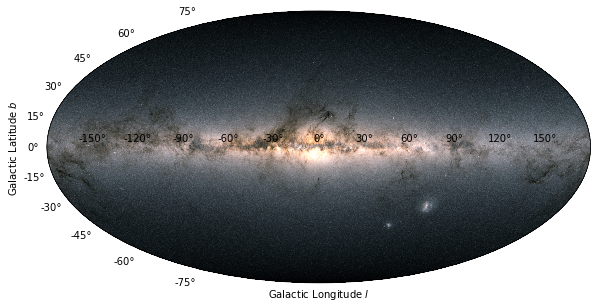

In [22]:
fig, ax = plt.subplots(figsize=(10,5), 
                       subplot_kw={'projection':'mollweide'}
                      )

pcolormesh_projected(edr3_skymap, 'mollweide', fig, ax)


ax.set(xlabel=r'Galactic Longitude $l$', 
       ylabel=r'Galactic Latitude $b$')

- Combining everything and by coloring the x-axis ticks as white for better visibility, we our final output:

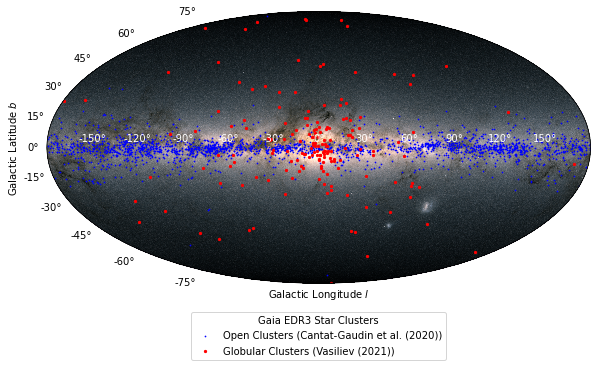

In [23]:
fig, ax = plt.subplots(figsize=(10,5), 
                       subplot_kw={'projection':'mollweide'}
                      )

pcolormesh_projected(edr3_skymap, 'mollweide', fig, ax)

ax.scatter(c_CA20.l.wrap_at('180d').radian, 
           c_CA20.b.radian, 
           c='blue', s=0.5, 
           label='Open Clusters (Cantat-Gaudin et al. (2020))')
ax.scatter(c_Vas21.galactic.l.wrap_at('180d').radian, 
           c_Vas21.galactic.b.radian, 
           c='red', s=5, 
           label='Globular Clusters (Vasiliev (2021))')

ax.legend(title='Gaia EDR3 Star Clusters', 
          loc='lower center', 
          bbox_to_anchor=(0.5, -0.3)
         )

ax.set(xlabel=r'Galactic Longitude $l$', 
       ylabel=r'Galactic Latitude $b$')
ax.tick_params(axis='x', colors='white')

In [24]:
fig.savefig('Gaia_EDR3_Star_Clusters.png', dpi=300, bbox_inches='tight')